# Notebook 4: Classification

## Objectives
By the end of this notebook, you will be able to:
1.  **Understand Classification**: Learn the difference between regression and classification.
2.  **Implement Logistic Regression**: Use `scikit-learn` to build a logistic regression model.
3.  **Evaluate Models**: Interpret Confusion Matrices, ROC curves, and AUC scores.
4.  **Apply KNN**: Implement K-Nearest Neighbors for classification.
5.  **Apply Best Practices**: Use `scikit-learn`'s modern plotting APIs and pipelines.

## Prerequisites
-   Notebook 3 (Linear Regression)
-   Basic understanding of probability (0 to 1).


## Part 1: Logistic Regression

### The Classification Problem
Unlike regression, where we predict a continuous number (e.g., price), classification predicts a category (e.g., "Spam" or "Not Spam", "Default" or "No Default").

### Logistic Regression
Despite its name, Logistic Regression is a classification algorithm. It estimates the probability that an instance belongs to a particular class. It uses the **sigmoid function** to map predictions to a value between 0 and 1.

$$ P(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X)}} $$

If the probability is > 0.5, we classify as Class 1; otherwise, Class 0.


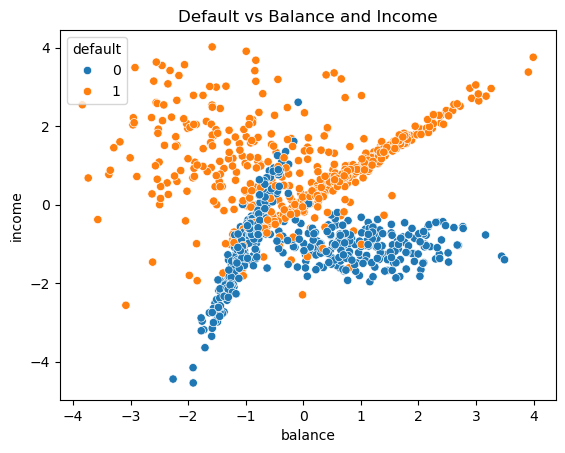

Accuracy: 0.8733333333333333


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Load Default dataset (simulated)
# In the original lecture, 'Default.csv' was used. We will create a synthetic version.
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)
df = pd.DataFrame(X, columns=['balance', 'income'])
df['default'] = y

# Visualize
sns.scatterplot(x='balance', y='income', hue='default', data=df)
plt.title("Default vs Balance and Income")
plt.show()

# Train Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(df[['balance', 'income']], df['default'], test_size=0.3, random_state=42)
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

print("Accuracy:", clf.score(X_test, y_test))


## Part 2: Evaluation Metrics

Accuracy is often not enough, especially with imbalanced datasets.

### Confusion Matrix
A table showing:
-   **True Positives (TP)**: Correctly predicted 1.
-   **True Negatives (TN)**: Correctly predicted 0.
-   **False Positives (FP)**: Predicted 1, but actually 0 (Type I Error).
-   **False Negatives (FN)**: Predicted 0, but actually 1 (Type II Error).

### ROC Curve & AUC
-   **ROC Curve**: Plots True Positive Rate vs. False Positive Rate at different thresholds.
-   **AUC (Area Under Curve)**: A single number summarizing the model's ability to distinguish classes. 1.0 is perfect, 0.5 is random guessing.


Confusion Matrix:
 [[133  15]
 [ 23 129]]


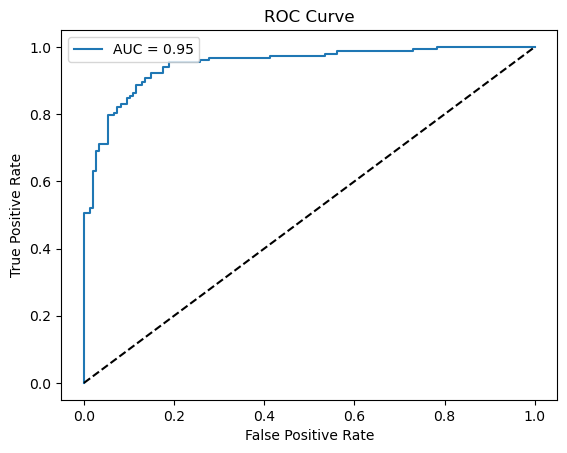

In [2]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_prob):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Part 3: K-Nearest Neighbors (KNN)

KNN is a simple, non-parametric algorithm. To classify a new data point, it looks at the 'K' closest labeled data points and takes a majority vote.

-   **K**: The number of neighbors to consider.
-   **Distance Metric**: How to measure "closeness" (usually Euclidean distance).


In [3]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN with K=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print("KNN Accuracy:", knn.score(X_test, y_test))


KNN Accuracy: 0.9366666666666666


## Exercises

### Task 1: Iris Classification
1.  Load the Iris dataset from `sklearn.datasets`.
2.  Split the data into training and testing sets.
3.  Train a **Logistic Regression** model to classify the species.
4.  Print the confusion matrix.

### Task 2: KNN Tuning
1.  Using the same Iris data, train **KNN** models with `n_neighbors` = 1, 5, and 10.
2.  Compare their accuracy scores on the test set. Which K performs best?


In [4]:
# --- SOLUTION TASK 1 ---
from sklearn.datasets import load_iris
iris = load_iris()
X_iris, y_iris = iris.data, iris.target
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)

log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train_i, y_train_i)
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test_i, log_reg.predict(X_test_i)))

# --- SOLUTION TASK 2 ---
for k in [1, 5, 10]:
    knn_i = KNeighborsClassifier(n_neighbors=k)
    knn_i.fit(X_train_i, y_train_i)
    print(f"KNN (K={k}) Accuracy: {knn_i.score(X_test_i, y_test_i):.4f}")


Logistic Regression Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


KNN (K=1) Accuracy: 1.0000
KNN (K=5) Accuracy: 1.0000
KNN (K=10) Accuracy: 1.0000


## Industry Best Practices

### Modern Plotting
Use `scikit-learn`'s display objects for easier evaluation plots.
```python
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
RocCurveDisplay.from_estimator(clf, X_test, y_test)
```

### Scaling
KNN is sensitive to the scale of features (because it uses distance). Always scale your data (e.g., `StandardScaler`) before using KNN.
```python
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier())
pipeline.fit(X_train, y_train)
```
